# Data Preparation

In this sectiono we load in and prepare the data for our machine learning.

In [1]:
# !pip install scipy
# !pip install pandas
# !pip install scikit-learn

You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
# !conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0
# # Anything above 2.10 is not supported on the GPU on Windows Native
# !pip install "tensorflow<2.11"




==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.4





Solving environment: ...working... done

# All requested packages already installed.



You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
# !pip list
# !pip install -q seaborn

Package                      Version
---------------------------- ------------
absl-py                      2.0.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.11.0
debugpy                      1.8.0
decorator                    5.1.1
exceptiongroup               1.1.3
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.42.1
gast                         0.4.0
google-auth                  2.23.1
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.58.0
h5py                         3.9.0
idna                         3.4
importlib-metadata           6.8.0
importlib-resources          6.1.0
ipy

You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import os
import scipy.io as sio
import pandas as pd
from scipy.io import loadmat
import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

np.set_printoptions(precision=3, suppress=True)

## Ingesting the data

The following data is from a Nasa dataset with n refferring to the iteration number of the dataset used. 
Temperature is in celcius
Voltage is in volts
Current is in Amps

In [3]:
n = 'B0005'
df = pd.read_csv('data_frames/' + 'NASA_cycle_dataset_' + n +'.csv',
                 parse_dates = ["datetime"]).drop(["Unnamed: 0"], axis = 1)
df.head()

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time,capacity
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000,NaN
1,1,24,2008-04-02 13:08:17,4.206466,0.060136,24.241571,0.057,4.250,5314.703,NaN
2,1,24,2008-04-02 13:08:17,4.206558,0.057209,24.230457,0.057,4.250,5329.485,NaN
3,1,24,2008-04-02 13:08:17,4.205512,0.050194,24.241984,0.047,4.245,5344.282,NaN
4,1,24,2008-04-02 13:08:17,4.205301,0.047004,24.226732,0.047,4.245,5359.141,NaN


## Beginning Data engineering

In the Below cells we are attempting to fill in the missing values. A brief look at the dataset showed that each cycle potentially had a capacity for at least one of its rows. 

First we test that theory:

In [4]:
capacity_counts = pd.DataFrame(df.groupby('cycle')['capacity'].nunique())
zero_capacity_rows = capacity_counts[capacity_counts['capacity'] != 1]
# capacity_counts
zero_capacity_rows

,capacity
cycle,
169,0
170,0


In [5]:
cap_std = df['capacity'].std()
cap_mean = df['capacity'].mean()

print(f"The standard deviation of capacity is {round(cap_std, 4)}.")
print(f"The average of capacity is {round(cap_mean, 4)}.")
print(f"This makes the standard deviation {round(cap_std/cap_mean*100,2)}% of the mean")

The standard deviation of capacity is 0.1824.
The average of capacity is 1.5603.
This makes the standard deviation 11.69% of the mean


The above cell shows that there is a singular battery capacity for each cycle except for 169 and 170.
For now we shall remove those two cycles as there is a large amount of deviation.

In [6]:
df = df[df['cycle'] <  169]
caps = pd.DataFrame(df.groupby('cycle')['capacity'].max())
temp = df.merge(caps, on='cycle', how='left').ffill()
temp = temp.drop(["capacity_x"], axis = 1).rename(columns = {"capacity_y" : "capacity"})
df = temp
temp.head()

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time,capacity
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000,1.856487
1,1,24,2008-04-02 13:08:17,4.206466,0.060136,24.241571,0.057,4.250,5314.703,1.856487
2,1,24,2008-04-02 13:08:17,4.206558,0.057209,24.230457,0.057,4.250,5329.485,1.856487
3,1,24,2008-04-02 13:08:17,4.205512,0.050194,24.241984,0.047,4.245,5344.282,1.856487
4,1,24,2008-04-02 13:08:17,4.205301,0.047004,24.226732,0.047,4.245,5359.141,1.856487


In [7]:
df['ambient_temperature'].nunique()

1

# Machine Learning (DNN)

Now we begin to build our Deep Neural Network

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras
import warnings

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
prep_df = df.drop(['datetime', 'ambient_temperature'], axis = 1)
train_dataset = prep_df.sample(frac=0.8, random_state = 0)
test_dataset = prep_df.drop(train_dataset.index)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.pairplot(train_dataset.iloc[:,0:8], diag_kind='kde')

In [12]:
# These are the features
train_features = train_dataset.copy()
test_features = test_dataset.copy()
print(train_features.iloc[0])
# These contain the target variables
train_labels = train_features.pop('capacity')
test_labels = test_features.pop('capacity')
print('--------------------------')
print(train_features.iloc[0])

cycle                   144.000000
voltage_measured          4.072683
current_measured          1.510459
temperature_measured     26.956490
current                   1.500000
voltage                   4.818000
time                    952.812000
capacity                  1.334007
Name: 489563, dtype: float64
--------------------------
cycle                   144.000000
voltage_measured          4.072683
current_measured          1.510459
temperature_measured     26.956490
current                   1.500000
voltage                   4.818000
time                    952.812000
Name: 489563, dtype: float64


In [13]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cycle,470279.0,95.409219,42.773598,1.000000,60.000000,96.000000,132.000000,168.000000
voltage_measured,470279.0,4.103417,0.213988,2.471315,4.087904,4.205138,4.205908,8.393141
current_measured,470279.0,0.368345,0.909263,-4.479660,0.039531,0.171773,1.262020,1.530376
temperature_measured,470279.0,26.375203,2.778615,23.214802,24.489668,25.483638,27.353169,41.450232
current,470279.0,0.635250,0.737908,-4.468000,0.057000,0.261000,1.498000,1.998400
voltage,470279.0,4.021478,1.213135,0.000000,4.240000,4.305000,4.656000,5.002000
time,470279.0,4763.490005,3149.187573,0.000000,1925.390000,4464.735000,7504.617000,10807.328000
capacity,470279.0,1.531792,0.171983,1.287453,1.370513,1.511898,1.694580,1.856487


## Normalisation

Here we will normalise the values to give equal weight to each feature

In [14]:
normalizer = keras.layers.Normalization(axis = 1)
normalizer.adapt(np.array(train_features))

In [15]:
train_features = normalizer(train_features)
test_features= normalizer(test_features)

## Regression with DNN

In [16]:
def build_and_compile_model():
    model=keras.Sequential([
        keras.layers.Dense(64, activation = 'swish'),
        keras.layers.Dense(64, activation = 'swish'),
        keras.layers.Dense(1, activation = 'relu')
    ])
    
    model.compile(loss= 'mean_absolute_error',
                 optimizer = keras.optimizers.Adam(0.001),
                 metrics=['mean_squared_error', 'mean_absolute_error'])
    return model

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    # plt.ylim([0, 1])
    plt.xlabel('Epoch')
    plt.ylabel('Error [capacity]')
    plt.title(title)
    plt.legend()
    plt.grid(True)

In [17]:
dnn_model = build_and_compile_model()
dnn_model(train_features)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (470279, 64)              512       
                                                                 
 dense_1 (Dense)             (470279, 64)              4160      
                                                                 
 dense_2 (Dense)             (470279, 1)               65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [18]:
epochs = 40
checkpoint_filepath = os.path.join('checkpoints', 'DNN{epoch:02d}-{val_loss:.4f}.h5')
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='mean_squared_error',
    mode='min',
    save_best_only=True)

if 'history' not in locals():
    print('New History array has been created')
    history =  []

New History array has been created


In [19]:
%%time
history.append(dnn_model.fit(
    train_features,
    train_labels,
    validation_split = 0.2,
    epochs = epochs,
    callbacks = model_checkpoint_callback))

Epoch 1/40
11757/11757 [==============================] - 65s 5ms/step - loss: 0.1232 - mean_squared_error: 0.1688 - mean_absolute_error: 0.1232 - val_loss: 0.1129 - val_mean_squared_error: 0.1583 - val_mean_absolute_error: 0.1129
Epoch 2/40
11757/11757 [==============================] - 63s 5ms/step - loss: 0.1142 - mean_squared_error: 0.1619 - mean_absolute_error: 0.1142 - val_loss: 0.1114 - val_mean_squared_error: 0.1582 - val_mean_absolute_error: 0.1114
Epoch 3/40
11757/11757 [==============================] - 63s 5ms/step - loss: 0.1132 - mean_squared_error: 0.1619 - mean_absolute_error: 0.1132 - val_loss: 0.1110 - val_mean_squared_error: 0.1583 - val_mean_absolute_error: 0.1110
Epoch 4/40
11757/11757 [==============================] - 62s 5ms/step - loss: 0.1125 - mean_squared_error: 0.1619 - mean_absolute_error: 0.1125 - val_loss: 0.1099 - val_mean_squared_error: 0.1582 - val_mean_absolute_error: 0.1099
Epoch 5/40
11757/11757 [==============================] - 63s 5ms/step - los

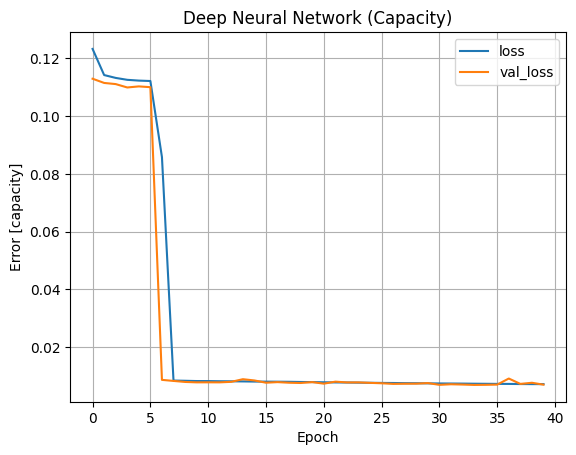

In [23]:
plot_loss(history[-1], 'Deep Neural Network (Capacity)')

### Performance

### Make Predictions

In [27]:
model_path = os.path.join("models","DNN_08.keras")

In [28]:
dnn_model.save(model_path)

In [29]:
dnn_model = tf.keras.models.load_model(model_path)

In [24]:
test_predictions = dnn_model.predict(test_features).flatten()

3675/3675 [==============================] - 5s 1ms/step


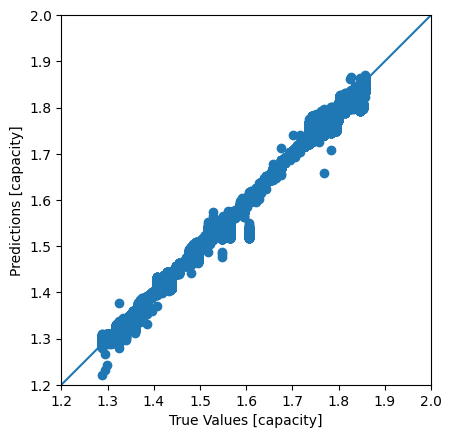

In [25]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [capacity]')
plt.ylabel('Predictions [capacity]')
lims = [1.2, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

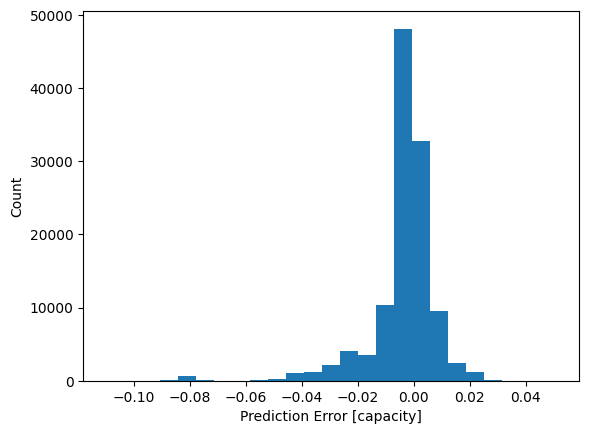

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [capacity]')
_ = plt.ylabel('Count')

In [30]:
# Calculate metrics
mse = mean_squared_error(test_labels, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_labels, test_predictions)
r2 = r2_score(test_labels, test_predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

MSE: 0.00015246502110845413
RMSE: 0.012347672700086205
MAE: 0.007142708591573988
R2 Score: 0.994844349759196


# Further Training

In [67]:
checkpoint_path = os.path.join('checkpoints', 'DNN40-0.0055.h5')
dnn_model_new = build_and_compile_model() 
dnn_model_new(train_features)
dnn_model_new.load_weights(checkpoint_path)

In [32]:
%%time
history.append(dnn_model.fit(
    train_features,
    train_labels,
    validation_split = 0.2,
    epochs = 40,
    callbacks = model_checkpoint_callback))

Epoch 1/40
11757/11757 [==============================] - 63s 5ms/step - loss: 0.0072 - mean_squared_error: 1.5703e-04 - mean_absolute_error: 0.0072 - val_loss: 0.0070 - val_mean_squared_error: 1.3771e-04 - val_mean_absolute_error: 0.0070
Epoch 2/40
11757/11757 [==============================] - 60s 5ms/step - loss: 0.0072 - mean_squared_error: 1.5711e-04 - mean_absolute_error: 0.0072 - val_loss: 0.0074 - val_mean_squared_error: 1.5146e-04 - val_mean_absolute_error: 0.0074
Epoch 3/40
11757/11757 [==============================] - 60s 5ms/step - loss: 0.0072 - mean_squared_error: 1.5614e-04 - mean_absolute_error: 0.0072 - val_loss: 0.0069 - val_mean_squared_error: 1.4381e-04 - val_mean_absolute_error: 0.0069
Epoch 4/40
11757/11757 [==============================] - 61s 5ms/step - loss: 0.0072 - mean_squared_error: 1.5569e-04 - mean_absolute_error: 0.0072 - val_loss: 0.0081 - val_mean_squared_error: 1.7144e-04 - val_mean_absolute_error: 0.0081
Epoch 5/40
11757/11757 [====================

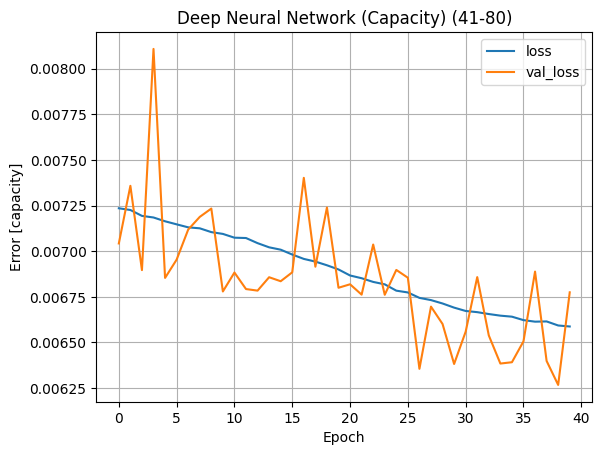

In [33]:
plot_loss(history[-1], 'Deep Neural Network (Capacity) (41-80)')

In [35]:
test_predictions = dnn_model.predict(test_features).flatten()

3675/3675 [==============================] - 5s 1ms/step


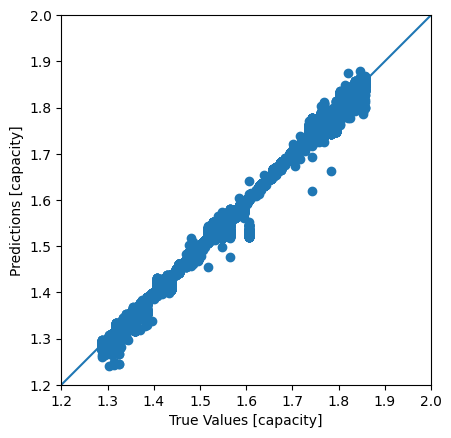

In [36]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [capacity]')
plt.ylabel('Predictions [capacity]')
lims = [1.2, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

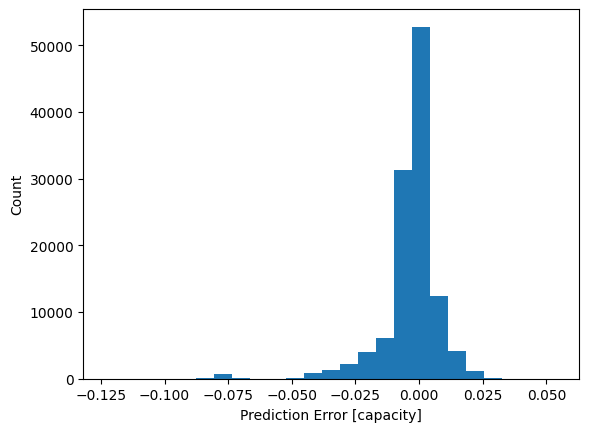

In [37]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [capacity]')
_ = plt.ylabel('Count')

In [38]:
# Calculate metrics
mse = mean_squared_error(test_labels, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_labels, test_predictions)
r2 = r2_score(test_labels, test_predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

MSE: 0.00013877646762195238
RMSE: 0.01178034242379874
MAE: 0.006833876262210787
R2 Score: 0.9953072322850754


## Further Training

In [87]:
checkpoint_path = os.path.join('checkpoints', 'DNN36-0.0050.h5')
dnn_model_new2 = build_and_compile_model() 
dnn_model_new2(train_features)
dnn_model_new2.load_weights(checkpoint_path)

In [39]:
%%time
history.append(dnn_model.fit(
    train_features,
    train_labels,
    validation_split = 0.2,
    epochs = 40,
    callbacks = model_checkpoint_callback))

Epoch 1/40
11757/11757 [==============================] - 66s 6ms/step - loss: 0.0066 - mean_squared_error: 1.4277e-04 - mean_absolute_error: 0.0066 - val_loss: 0.0064 - val_mean_squared_error: 1.2692e-04 - val_mean_absolute_error: 0.0064
Epoch 2/40
11757/11757 [==============================] - 63s 5ms/step - loss: 0.0066 - mean_squared_error: 1.4291e-04 - mean_absolute_error: 0.0066 - val_loss: 0.0067 - val_mean_squared_error: 1.3924e-04 - val_mean_absolute_error: 0.0067
Epoch 3/40
11757/11757 [==============================] - 59s 5ms/step - loss: 0.0066 - mean_squared_error: 1.4145e-04 - mean_absolute_error: 0.0066 - val_loss: 0.0062 - val_mean_squared_error: 1.2189e-04 - val_mean_absolute_error: 0.0062
Epoch 4/40
11757/11757 [==============================] - 61s 5ms/step - loss: 0.0066 - mean_squared_error: 1.4396e-04 - mean_absolute_error: 0.0066 - val_loss: 0.0065 - val_mean_squared_error: 1.2488e-04 - val_mean_absolute_error: 0.0065
Epoch 5/40
11757/11757 [====================

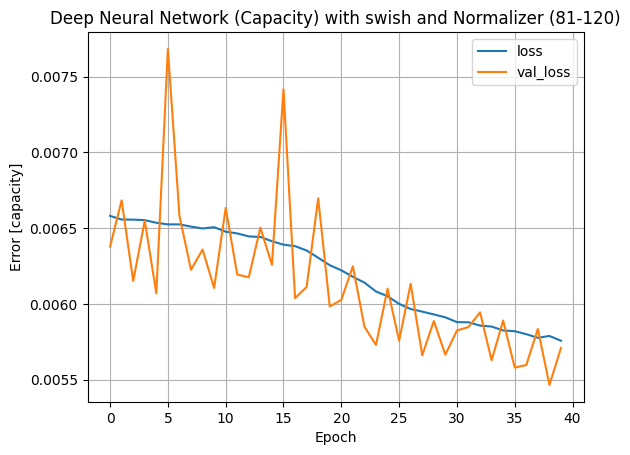

In [40]:
plot_loss(history[-1], 'Deep Neural Network (Capacity) with swish and Normalizer (81-120)')

In [91]:
test_predictions = dnn_model_new.predict(test_features).flatten()

3675/3675 [==============================] - 5s 1ms/step


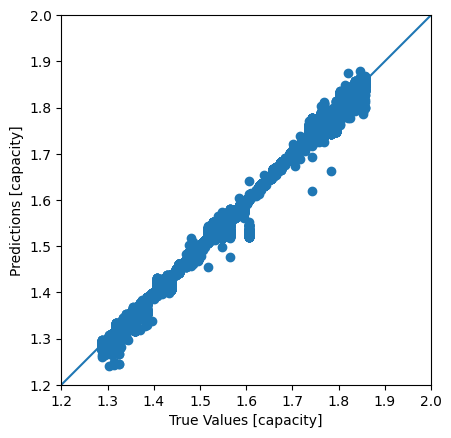

In [41]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [capacity]')
plt.ylabel('Predictions [capacity]')
lims = [1.2, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

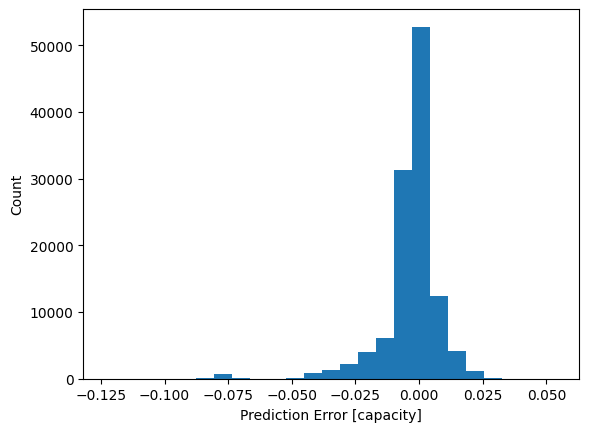

In [42]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [capacity]')
_ = plt.ylabel('Count')

In [43]:
# Calculate metrics
mse = mean_squared_error(test_labels, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_labels, test_predictions)
r2 = r2_score(test_labels, test_predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

MSE: 0.00013877646762195238
RMSE: 0.01178034242379874
MAE: 0.006833876262210787
R2 Score: 0.9953072322850754


In [44]:
checkpoint_path = os.path.join('checkpoints', 'DNN37-0.0069.h5')
dnn_model.load_weights(checkpoint_path)